# Conflict Monitoring and Cognitive Control

Here, we see how we can use [psyneulink](https://princetonuniversity.github.io/PsyNeuLink/) to create a custom synthetic [experiment runner](../../experiment-runner/index.md)

We implement the model for conflict monitoring and cognitive control presented in [Botvinick et al, 2001](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=71d71283ef5e5c7f2dc49a352e553bf12c382250)

In [11]:
from psyneulink import *
import numpy as np

# CONSTRUCT THE MODEL ***********************************

# Construct the color naming pathway:
color_input = ProcessingMechanism(name='COLOR INPUT', size=2) # Note:  default function is Linear
color_input_to_hidden_wts = np.array([[2, -2], [-2, 2]])
color_hidden = ProcessingMechanism(name='COLOR HIDDEN', size=2, function=Logistic(bias=-4))
color_hidden_to_output_wts = np.array([[2, -2], [-2, 2]])
output = ProcessingMechanism(name='OUTPUT', size=2, function=Logistic)
color_pathway = [color_input, color_input_to_hidden_wts, color_hidden, color_hidden_to_output_wts, output]

# Construct the word reading pathway (using the same output_layer)
word_input = ProcessingMechanism(name='WORD INPUT', size=2)
word_input_to_hidden_wts = np.array([[3, -3], [-3, 3]])
word_hidden = ProcessingMechanism(name='WORD HIDDEN', size=2, function=Logistic(bias=-4))
word_hidden_to_output_wts = np.array([[3, -3], [-3, 3]])
word_pathway = [word_input, word_input_to_hidden_wts, word_hidden, word_hidden_to_output_wts, output]

# Construct the task specification pathways
task_input = ProcessingMechanism(name='TASK INPUT', size=2)
task = LCAMechanism(name='TASK', size=2)
task_color_wts = np.array([[4,4],[0,0]])
task_word_wts = np.array([[0,0],[4,4]])
task_color_pathway = [task_input, task, task_color_wts, color_hidden]
task_word_pathway = [task_input, task, task_word_wts, word_hidden]

# Construct the decision pathway:
decision = DDM(name='DECISION', input_format=ARRAY)
decision_pathway = [output, decision]

# Construct control mechanism
control = ControlMechanism(name='CONTROL',
                           objective_mechanism=ObjectiveMechanism(name='Conflict Monitor',
                                                                  function=Energy(size=2,
                                                                                  matrix=[[0,-2.5],[-2.5,0]]),
                                                                  monitor=output),
                           default_allocation=[0.5],
                           control_signals=[(GAIN, task)])

# Construct the Composition:
Stroop_model = Composition(name='Stroop Model - Conflict Monitoring')
Stroop_model.add_linear_processing_pathway(color_pathway)
Stroop_model.add_linear_processing_pathway(word_pathway)
Stroop_model.add_linear_processing_pathway(task_color_pathway)
Stroop_model.add_linear_processing_pathway(task_word_pathway)
Stroop_model.add_linear_processing_pathway(decision_pathway)
Stroop_model.add_controller(control)

# # Assign conditions:
settling_time = 100
Stroop_model.scheduler.add_condition(color_hidden, EveryNCalls(task, settling_time))
Stroop_model.scheduler.add_condition(word_hidden, EveryNCalls(task, settling_time))


# SHOW_GRAPH ***********************************
# Stroop_model.show_graph(show_controller=True,
#                         # show_node_structure=ALL
#                         )

# RUN THE MODEL *********************************

# Label inputs
red = [1,0]
green = [0,1]
word = [0,1]
color = [1,0]

np.set_printoptions(precision=2)
global t
t = 0
def print_after():
    global t
    print(f'\nEnd of trial {t}:')
    print(f'\t\t\t\tcolor  word')
    print(f'\ttask:\t\t{task.value[0]}')
    print(f'\ttask gain:\t   {task.parameter_ports[GAIN].value}')
    # print(f'\ttask gain:\t   {task.function.parameters.gain}')
    print(f'\t\t\t\tred   green')
    print(f'\toutput:\t\t{output.value[0]}')
    print(f'\tdecision:\t{decision.value[0]}{decision.value[1]}')
    print(f'\tconflict:\t  {control.objective_mechanism.value[0]}')
    t += 1

# task.log.set_log_conditions(VALUE)
# control.log.set_log_conditions(VALUE)

task.initial_value = [0.5,0.5]
task.reset_stateful_function_when=AtTrialStart()
num_trials = 4
stimuli = {color_input:[red] * num_trials,
           word_input:[green] * num_trials,
           task_input:[color] * num_trials}

Stroop_model.run(inputs=stimuli,
                 # animate={'show_controller':True,
                 #          # 'show_cim':True
                 #          },
                 call_after_trial=print_after)

# Stroop_model.log.print_entries(display=[TIME, VALUE])


End of trial 0:
				color  word
	task:		[0.58 0.48]
	task gain:	   [0.5]
				red   green
	output:		[0.27 0.73]
	decision:	[-1.][2.25]
	conflict:	  [0.49]

End of trial 1:
				color  word
	task:		[0.58 0.48]
	task gain:	   [0.49]
				red   green
	output:		[0.27 0.73]
	decision:	[-1.][2.24]
	conflict:	  [0.49]

End of trial 2:
				color  word
	task:		[0.58 0.48]
	task gain:	   [0.49]
				red   green
	output:		[0.27 0.73]
	decision:	[-1.][2.24]
	conflict:	  [0.49]

End of trial 3:
				color  word
	task:		[0.58 0.48]
	task gain:	   [0.49]
				red   green
	output:		[0.27 0.73]
	decision:	[-1.][2.24]
	conflict:	  [0.49]


/Users/younesstrittmatter/Documents/GitHub/AutoResearch/autora_parent/.venv/lib/python3.11/site-packages/psyneulink/core/compositions/composition.py:4595: UserWarning: NodeRole.CONTROLLER_OBJECTIVE should be assigned with caution to Stroop Model - Conflict Monitoring-10. ObjectiveMechanisms are generally constructed automatically by a ControlMechanism, or assigned to it in the 'objective_mechanism' argument of its constructor.  Doing so otherwise may cause unexpected results.
  warnings.warn(f"{role} should be assigned with caution to {self.name}. "


[array([-1.]), array([2.24])]

## Create the model in psyneulink

First, we create the model in psyneulink. Here, we will not go into detail how to implement the model in psyneulink. [Here](https://www.psyneuln.deptcpanel.princeton.edu/), you can find excellent documentation and tutorials on Psyneulink

(1) Install Psyneulink

In [1]:
# !pip install psyneulink

(2) Create the model *Composition*

In [5]:
from psyneulink import *
import numpy as np

# CONSTRUCT THE MODEL ***********************************

# Construct the color naming pathway:
color_input = ProcessingMechanism(name='COLOR INPUT', size=2)  # Note:  default function is Linear
color_input_to_hidden_wts = np.array([[2, -2], [-2, 2]])
color_hidden = ProcessingMechanism(name='COLOR HIDDEN', size=2, function=Logistic(bias=-4))
color_hidden_to_output_wts = np.array([[2, -2], [-2, 2]])
output = ProcessingMechanism(name='OUTPUT', size=2, function=Logistic)
color_pathway = [color_input, color_input_to_hidden_wts, color_hidden, color_hidden_to_output_wts, output]

# Construct the word reading pathway (using the same output_layer)
word_input = ProcessingMechanism(name='WORD INPUT', size=2)
word_input_to_hidden_wts = np.array([[3, -3], [-3, 3]])
word_hidden = ProcessingMechanism(name='WORD HIDDEN', size=2, function=Logistic(bias=-4))
word_hidden_to_output_wts = np.array([[3, -3], [-3, 3]])
word_pathway = [word_input, word_input_to_hidden_wts, word_hidden, word_hidden_to_output_wts, output]

# Construct the task specification pathways
task_input = ProcessingMechanism(name='TASK INPUT', size=2)
task = LCAMechanism(name='TASK', size=2, initial_value=[0.5, 0.5])
task_color_wts = np.array([[4, 4], [0, 0]])
task_word_wts = np.array([[0, 0], [4, 4]])
task_color_pathway = [task_input, task, task_color_wts, color_hidden]
task_word_pathway = [task_input, task, task_word_wts, word_hidden]

# Construct the decision pathway:
# decision = DDM(name='DECISION',
#                input_format=ARRAY,
#                reset_stateful_function_when=AtTrialStart(),
#                function=DriftDiffusionIntegrator(noise=0.5, threshold=20)
#                )
decision = DDM(name='DECISION', input_format=ARRAY)
decision_pathway = [output, decision]

# Construct control mechanism
control = ControlMechanism(name='CONTROL',
                           objective_mechanism=ObjectiveMechanism(name='Conflict Monitor',
                                                                  function=Energy(size=2,
                                                                                  matrix=[[0, -2.5], [-2.5, 0]]),
                                                                  monitor=output),
                           default_allocation=[0.5],
                           control_signals=[(GAIN, task)])

# Construct the Composition:
Stroop_model = Composition(name='Stroop Model')
Stroop_model.add_linear_processing_pathway(color_pathway)
Stroop_model.add_linear_processing_pathway(word_pathway)
Stroop_model.add_linear_processing_pathway(task_color_pathway)
Stroop_model.add_linear_processing_pathway(task_word_pathway)
Stroop_model.add_linear_processing_pathway(decision_pathway)
Stroop_model.add_controller(control)



/Users/younesstrittmatter/Documents/GitHub/AutoResearch/autora_parent/.venv/lib/python3.11/site-packages/psyneulink/core/compositions/composition.py:9649: UserWarning: The controller of 'Stroop Model-3' has a specification that includes the Mechanism 'Conflict Monitor-3', but 'Conflict Monitor-3' is not in 'Stroop Model-3' or any of its nested Compositions. This Mechanism will be deactivated until 'Conflict Monitor-3' is added to 'Stroop Model-3' or one of its nested Compositions in a compatible way.
  warnings.warn(


AssertionError: WARNING MESSAGE

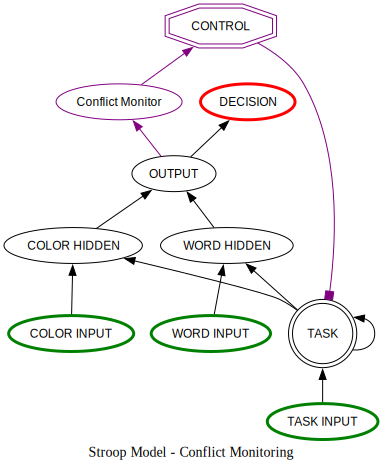

In [4]:
Stroop_model.show_graph(output_fmt='jupyter')

In [5]:
COLOR_MAPPING = {'red': [1, 0], 'green': [0, 1]}
WORD_MAPPING = {'RED': [1, 0], 'GREEN': [0, 1]}
TASK_MAPPING = {'color_naming': [1, 0], 'word_reading': [0, 1]}

def trial_to_input(trial):
    return {
        color_input: COLOR_MAPPING[trial['color']],
        word_input: WORD_MAPPING[trial['word']],
        task_input: TASK_MAPPING[trial['task']]
    }

In [6]:
global t
t = 0
def print_after():
    global t
    print(f'\nEnd of trial {t}:')
    print(f'\t\t\t\tcolor  word')
    print(f'\ttask:\t\t{task.value[0]}')
    print(f'\ttask gain:\t   {task.parameter_ports[GAIN].value}')
    print(f'\t\t\t\tred   green')
    print(f'\toutput:\t\t{output.value[0]}')
    print(f'\tdecision:\t{decision.value[0]}{decision.value[1]}')
    print(f'\tconflict:\t  {control.objective_mechanism.value[0]}')
    t += 1

from collections import defaultdict


def run(trials):
    _transformed = [trial_to_input(t) for t in trials]
    dict_of_lists = defaultdict(list)

    for d in _transformed:
        for key, value in d.items():
            dict_of_lists[key].append(value)

    _trials = dict(dict_of_lists)
    print(_trials)

    Stroop_model.run(inputs=_trials,
                     call_after_trial=print_after)
    

In [7]:
trials = [
    {'color': 'red', 'word': 'RED', 'task': 'color_naming'},
    {'color': 'red', 'word': 'GREEN', 'task': 'color_naming'},
    {'color': 'red', 'word': 'GREEN', 'task': 'color_naming'},
    {'color': 'red', 'word': 'GREEN', 'task': 'color_naming'},
    {'color': 'red', 'word': 'GREEN', 'task': 'color_naming'},
    {'color': 'red', 'word': 'GREEN', 'task': 'color_naming'},
]
task.initial_value = [0.5,0.5]         # Assign "neutral" starting point for task units on each trial
task.reset_stateful_function_when=AtTrialStart()
run(trials)
    

{(ProcessingMechanism COLOR INPUT-1): [[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0]], (ProcessingMechanism WORD INPUT-1): [[1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]], (ProcessingMechanism TASK INPUT-1): [[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]}


RunError: "The following items specified in the 'inputs' arg of the run() method for 'Stroop Model - Conflict Monitoring' are not INPUT Nodes of that Composition (nor InputPorts of them): 'COLOR INPUT-1', 'WORD INPUT-1', 'TASK INPUT-1'."

In our case, we define a trial as dictionary (For example, t = {'color': 'red', 'word': RED, 'task': 'word reading'}). Here, we define a function that transforms the trial in dictionary format to a trial that can be passed into the run function of a composition:

In [197]:
def transform_trial(trial):
    color_mapping = {'red': [1, 0, 0], 'green': [0, 1, 0], 'neutral': [0, 0, 1]}
    word_mapping = {'RED': [1, 0, 0], 'GREEN': [0, 1, 0], 'NEUTRAL': [0, 0, 1]}
    task_mapping = {'color naming': [1, 0], 'word naming': [0, 1]}
    return {
        'init': {
        colors_input_layer: [0, 0, 0],
        words_input_layer: [0, 0, 0],
        task_input_layer: task_mapping[trial['task']]
    }, 
        'trial': {
    
        colors_input_layer: color_mapping[trial['color']],
        words_input_layer: word_mapping[trial['word']],
        task_input_layer: task_mapping[trial['task']]
        }
    }

We can now define a run function for a single trial

In [198]:
def run(trial):
    _transformed = transform_trial(trial)
    colors_hidden_layer.reset([[0, 0, 0]], context=comp)
    words_hidden_layer.reset([[0, 0, 0]], context=comp)
    response_layer.reset([[0, 0]], context=comp)
    task_layer.reset([[0, 0]], context=comp)
    comp.reset()
    comp.run(_transformed['init'], num_trials=500)
    comp.run(_transformed['trial'], num_trials=1000)
    return comp.results[-1]

In [199]:
test_trial = {'color': 'green', 'word': 'GREEN', 'task': 'color naming'}
run(test_trial)

[array([0.15, 0.86, 0.11]),
 array([0.15, 0.93, 0.08]),
 array([0.97, 0.94]),
 array([0.21, 0.96]),
 array([0.82])]

In [200]:


Stimulus = [[CN_trial_initialize_input, CN_congruent_trial_input],
            [CN_trial_initialize_input, CN_incongruent_trial_input],
            [CN_trial_initialize_input, CN_control_trial_input]]

# should be 500 and 1000
ntrials0 = 5
ntrials = 10
comp._analyze_graph()

comp.show_graph()

def run(bin_execute):
    results = []
    for stim in Stimulus:
        # RUN the SYSTEM to initialize ---------------------------------------
        comp.run(inputs=stim[0], num_trials=ntrials0, bin_execute=bin_execute)
        comp.run(inputs=stim[1], num_trials=ntrials, bin_execute=bin_execute)
        # reset after condition was run
        colors_hidden_layer.reset([[0, 0, 0]], context=comp)
        words_hidden_layer.reset([[0, 0, 0]], context=comp)
        response_layer.reset([[0, 0]], context=comp)
        task_layer.reset([[0, 0]], context=comp)
        # Comp results include concatenation of both the above runs
        results.append(comp.results.copy())
        comp.reset()
        comp.results = []

    return results


NameError: name 'CN_trial_initialize_input' is not defined